In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
pysh.utils.figstyle(rel_width=0.1)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

We start by setting the truncation degree for the calculations

In [3]:
L = 256

Next we read in the current sea level, $SL$, and ice thickness, $I$, from a data file. These variables are stored on a real Gauss-Legendre grid. They can be plotted showing coastlines using SL.geo_plot() whose second argument selects the colourmap used.

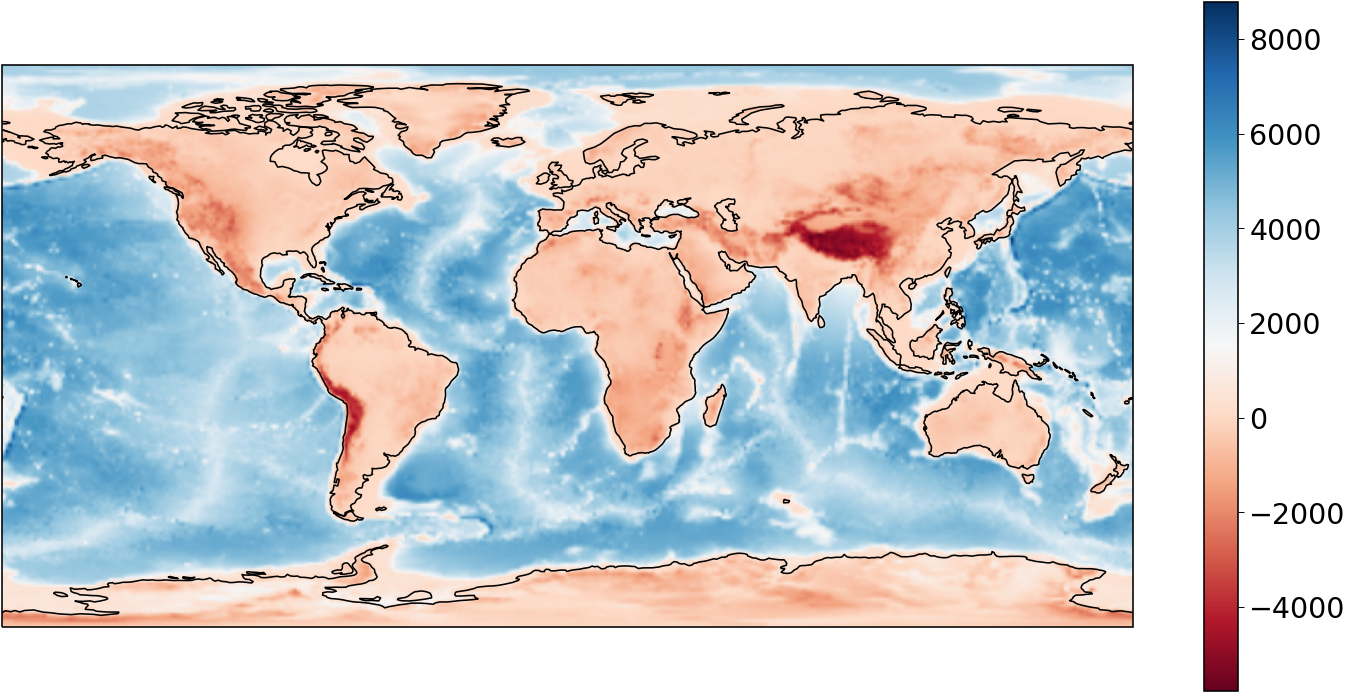

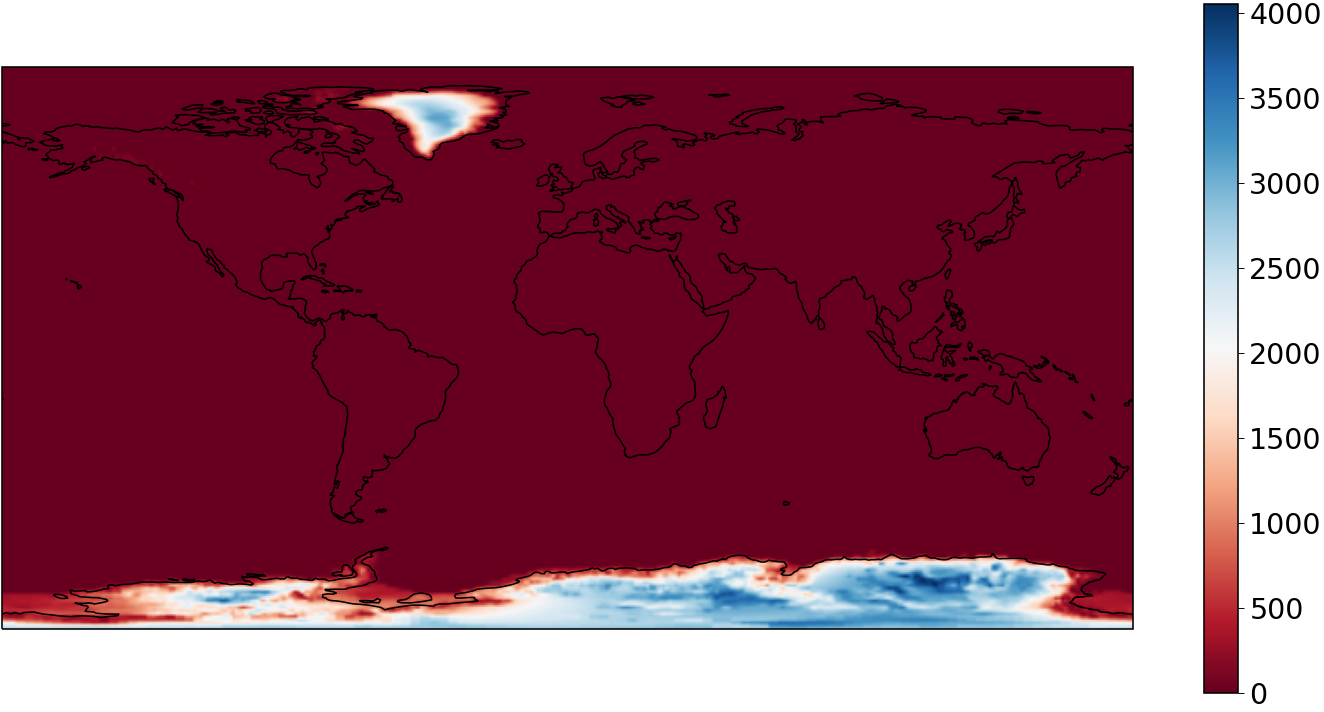

In [4]:
sl,ice = SL.get_sl_ice_data(L)
SL.geo_plot(sl,'RdBu')
SL.geo_plot(ice,'RdBu')

From the sea level and ice, we can compute the ocean area. Note that the ocean function is defined to equal one where there is to equal one where water is present and zero elsewhere. Based on a simple isostatic balance between the water and ice, we have
\begin{equation}
C(\theta,\varphi) = \left\{
\begin{array}{cc}
1 & \rho_{w} SL(\theta,\varphi) \ge \rho_{i} I(\theta,\varphi) \\
0 & \rho_{w} SL(\theta,\varphi) < \rho_{i} I(\theta,\varphi) 
\end{array}
\right.
\end{equation}
The ocean area is then defined as
\begin{equation}
A = \int_{\partial M} C\, \mathrm{d} S.
\end{equation}


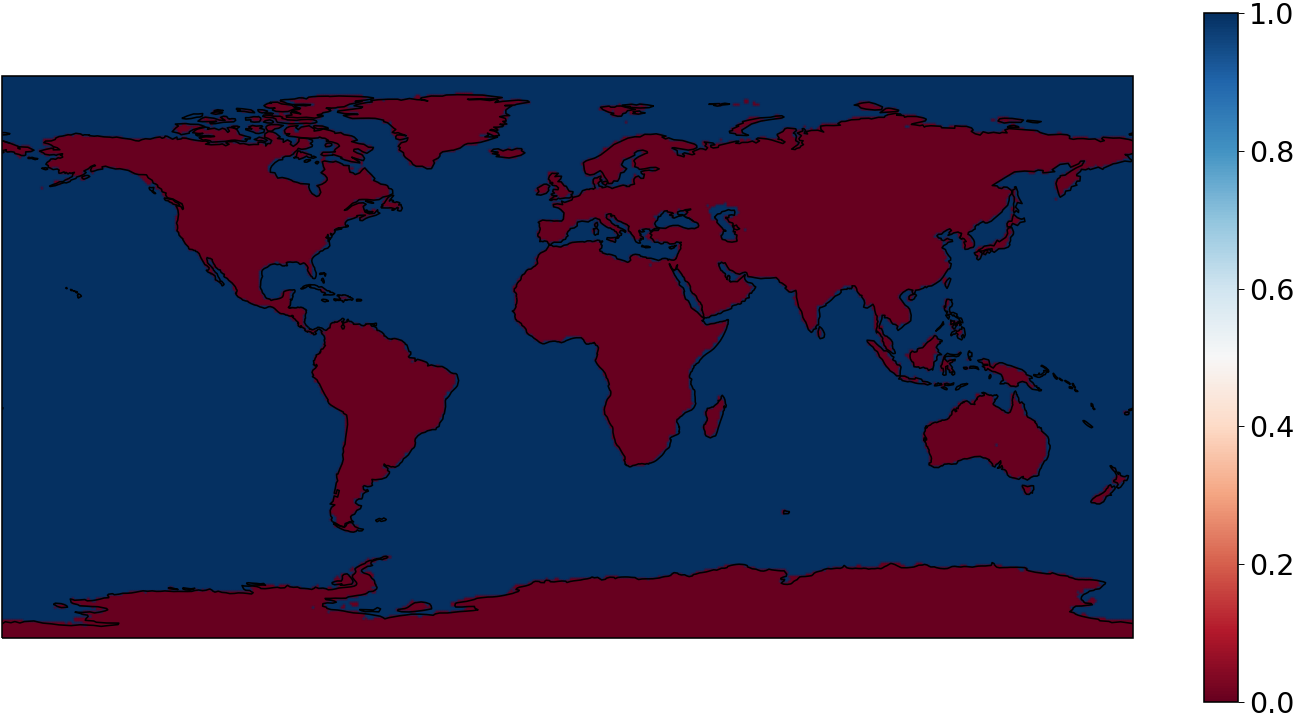

fraction of surface which is ocean =  0.7129602337196239


In [10]:
C,A = SL.ocean_function(sl,ice)
SL.geo_plot(C,'RdBu')
# compute the surface area of the Earth and print fraction that is oceans
A_earth = 4*pi*SL.b**2
print('fraction of surface which is ocean = ',A/A_earth)

We now set the ice to be melted, taking as an example a reduction in the height of the Greenland ice sheet by 1%. This can be done as follows:


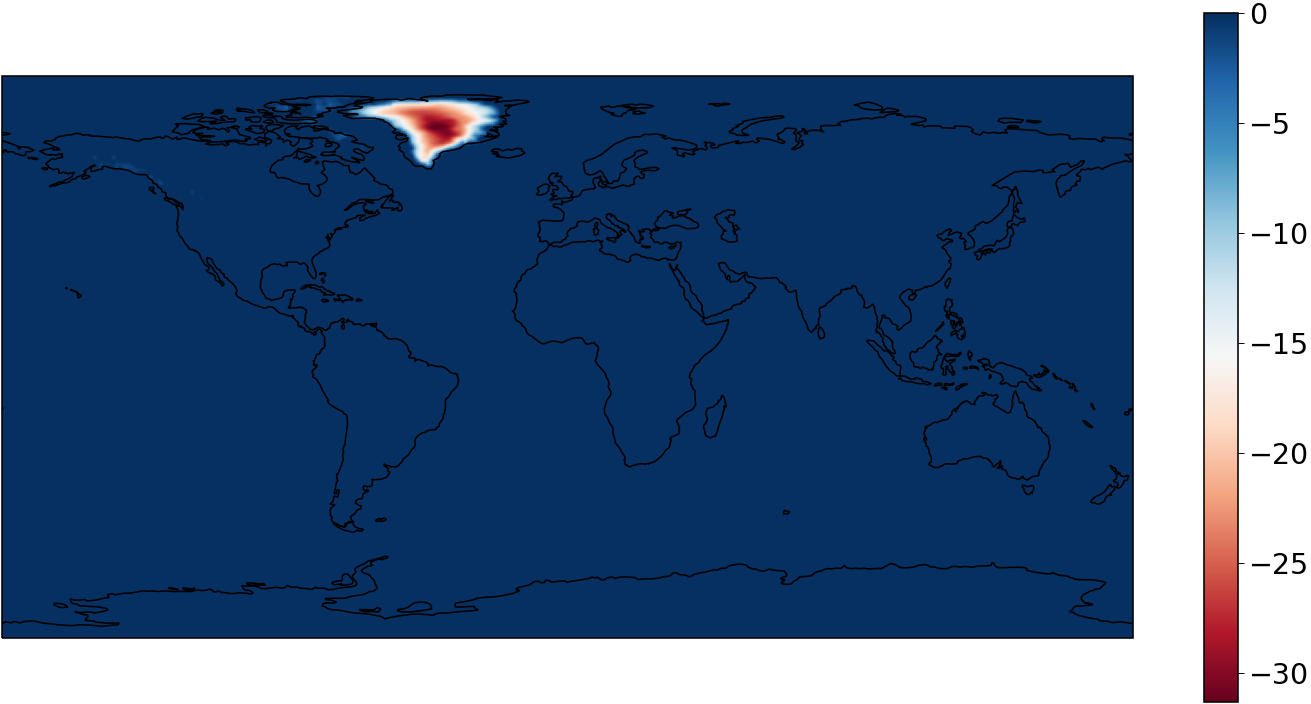

In [12]:
Dice = -0.01*SL.zero_southern_hemisphere(ice)
SL.geo_plot(Dice,'RdBu')

Having now defined the problem to be solved, we can solve the sea level equation by calling the following function. Note that it returns as spatial fields (at the chosen trunction degree) the sea level change in DSL, the vertical displacement in Du, and the gravitational poetntial change in Dphi.

iteration =  1 relative change =  18.15237417927504
iteration =  2 relative change =  0.34422383718304433
iteration =  3 relative change =  0.039462651793816084
iteration =  4 relative change =  0.006026597557569349
iteration =  5 relative change =  0.0010475305170500428
iteration =  6 relative change =  0.00019559069706702467


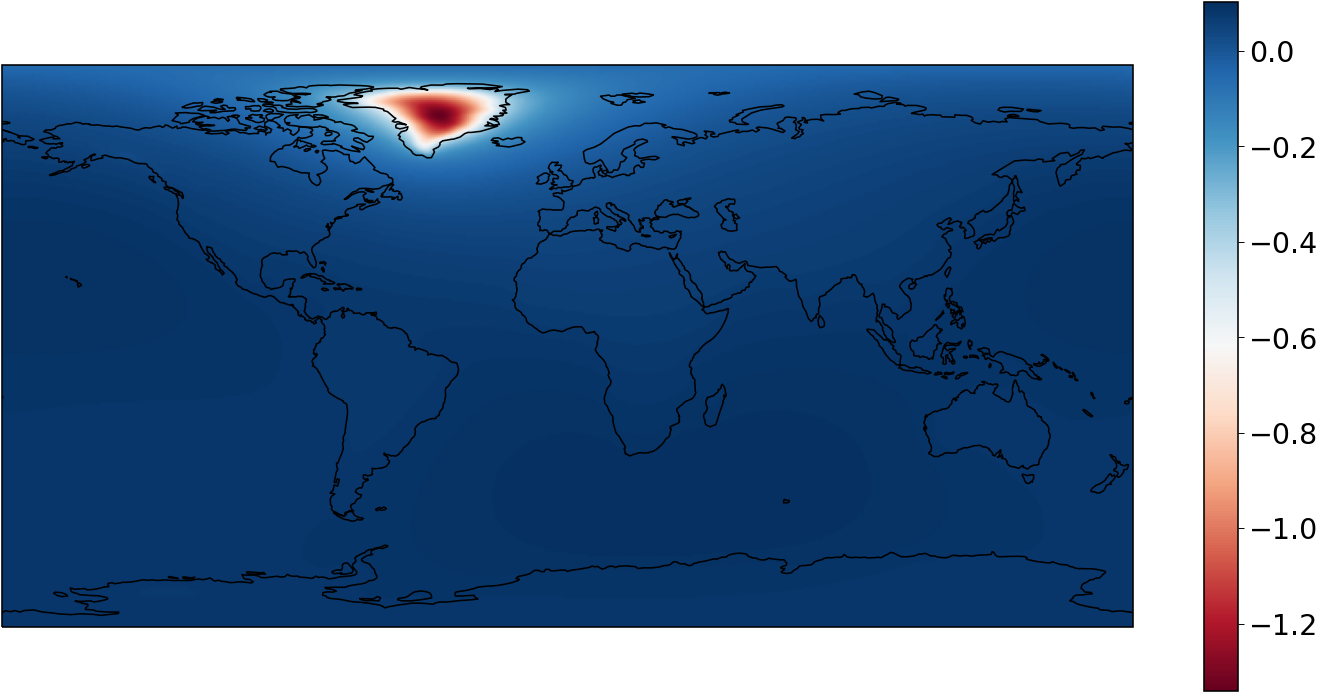

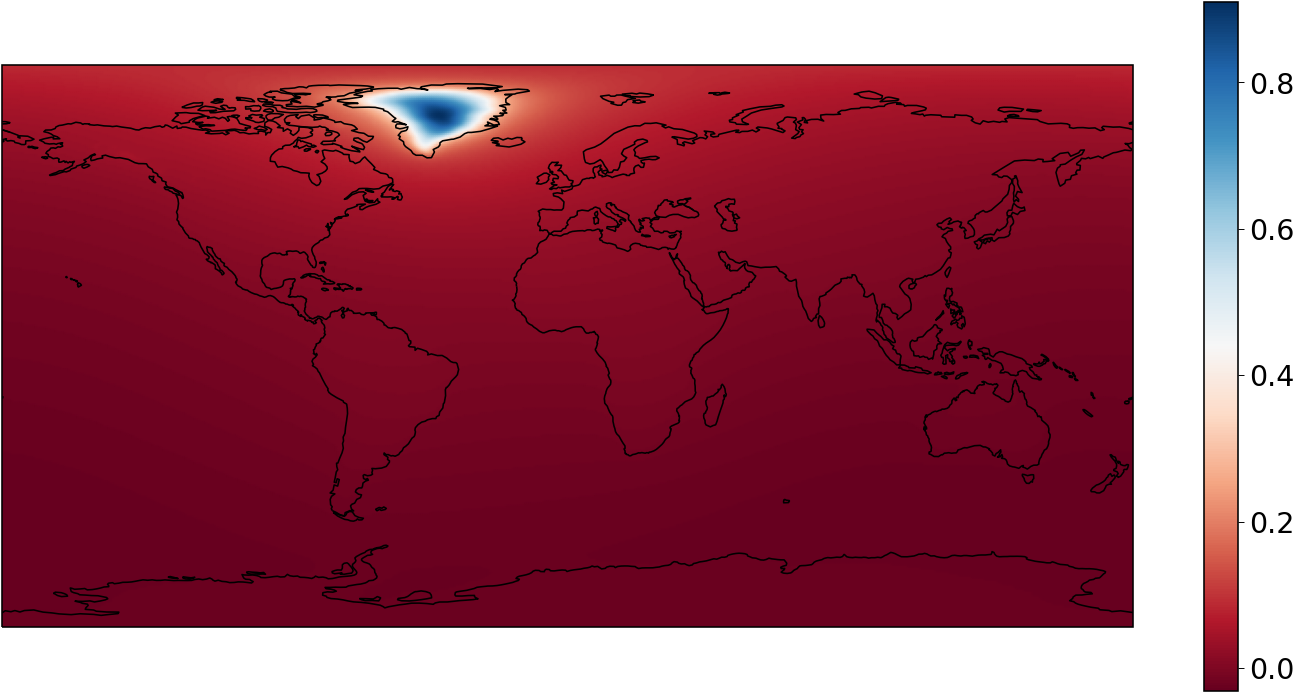

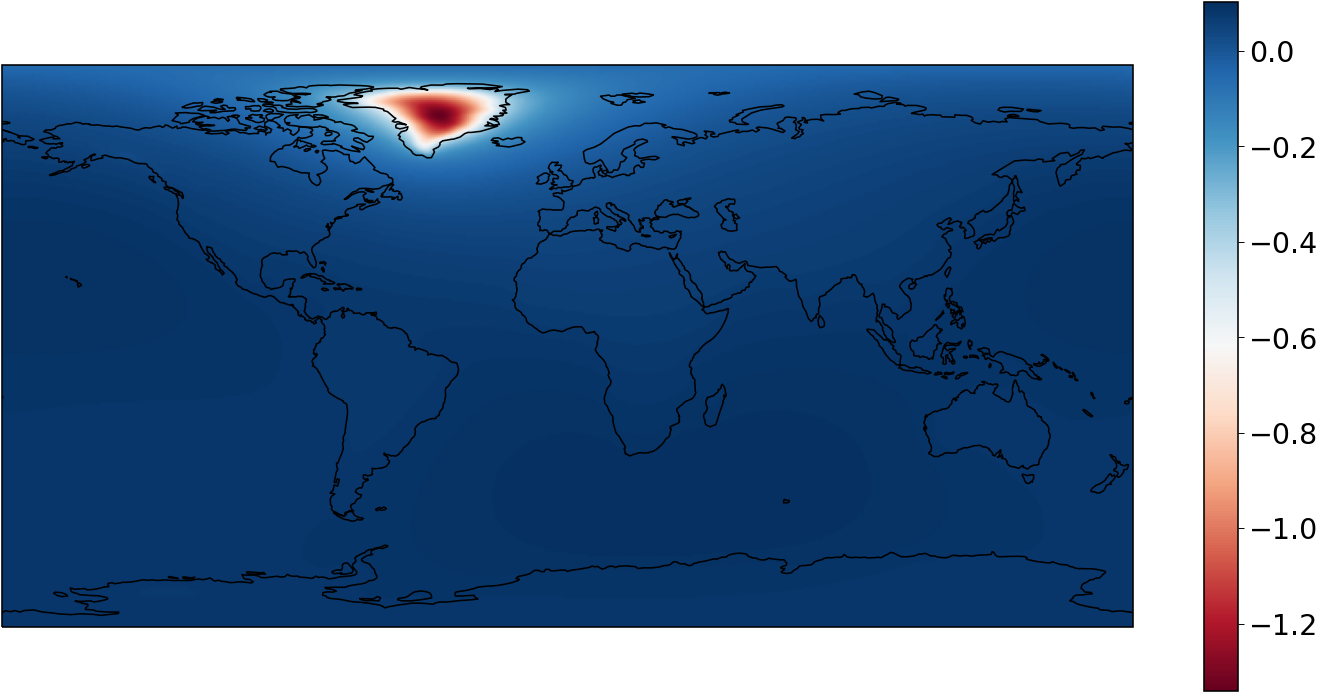

In [15]:
Dsl,Du,Dphi =  SL.fingerprint(sl,ice,Dice)
SL.geo_plot(Dsl,'RdBu')
SL.geo_plot(Du,'RdBu')
SL.geo_plot(Dsl,'RdBu')

By default, these calculations include rotational feedbacks. If you want to turn this off you can add in an optional argument in the following manner. Note the use of underbars here to ignore some of the returned values.
The plot shows the difference between the calculation with and without rotational feedbacks. These effects always have a characteristic $l = 2$ $m = \pm 1$ pattern 

iteration =  1 relative change =  18.133975397717602
iteration =  2 relative change =  0.34097781131992977
iteration =  3 relative change =  0.03541335357835698
iteration =  4 relative change =  0.004889046683958026
iteration =  5 relative change =  0.0007557713941315094


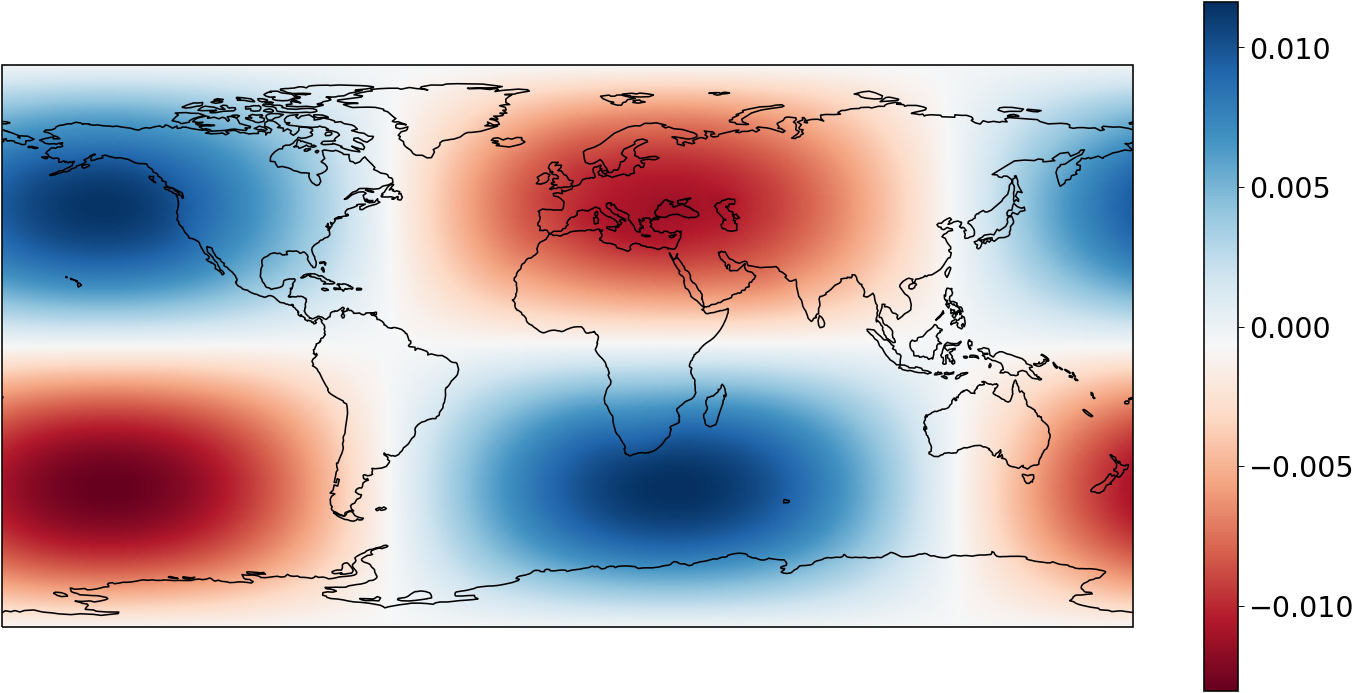

In [16]:
Dsl2,_,_ = SL.fingerprint(sl,ice,Dice,rotation=False)
SL.geo_plot(Dsl-Dsl2,'RdBu')